In [ ]:
#Targeted metabolite analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.multitest import multipletests
from scipy.stats import mannwhitneyu, f_oneway 


In [ ]:
df=pd.read_csv('set1_metabolites.csv', sep=',', encoding='cp1252' )


In [ ]:
df.dropna(thresh=len(df) - 5, axis=1, inplace=True)###drop columns with more than 80% NAN


In [ ]:
X2 = df.iloc[:,2:717]  # all rows, all the features and no labels
X2.fillna(0, inplace=True)


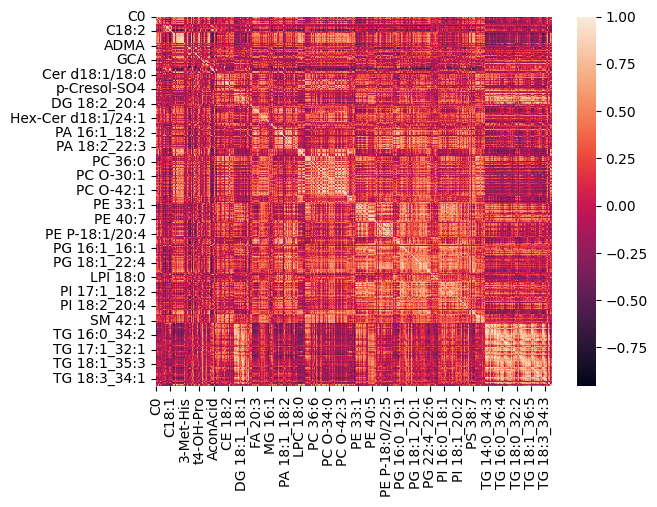

In [ ]:
############################### additional steps #########################
# Mean
X_mean = X2.mean()
X_sum = X2.sum()
 
# Standard deviation
X_std = X2.std()
 
# Standardization
Z = (X2 - X_mean) / X_std

# covariance
c = Z.cov()
c.fillna(0, inplace = True)
 
# the covariance matrix
sns.heatmap(c)
plt.savefig('autoscaled_targ.png', dpi=600)
plt.savefig('autoscaled_targ.tiff', dpi=600)

plt.show()

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


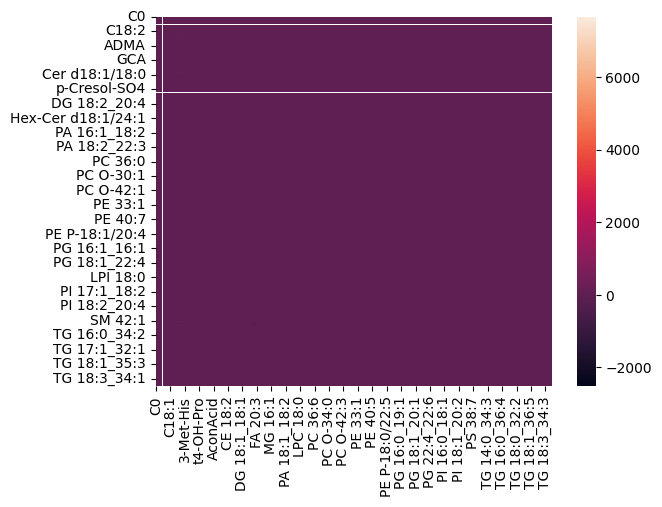

In [76]:
##pareto scaling
pareto_scaled_data = X2 / np.sqrt(X_std)
pareto_scaled_data.fillna(0, inplace = True)
# covariance
c1 = pareto_scaled_data.cov()
sns.heatmap(c1)
plt.savefig('paretoscaled_targ.png', dpi=600)
plt.savefig('paretoscaled_targ.tiff', dpi=600)
plt.show()


In [251]:
###pareto scaling didnt yield good correlation. hence moving on with total std normalization and auto scaling
X2.dtypes
X2.sum
X2 = X2.apply(pd.to_numeric, errors='coerce').fillna(0)

In [ ]:

scaler = StandardScaler()
X2_normalized = X2.div(X2.sum(axis=1), axis=0)

##log transformation
X2log_transformed_data = np.log1p(X2_normalized)

##auto scaling
X2_scaled = scaler.fit_transform(X2log_transformed_data)
X2_scaled



array([[ 8.46487835e-01,  8.89093295e-01,  1.43175065e+00, ...,
        -5.43315196e-01,  2.42345802e-01, -5.40363485e-01],
       [ 9.10033343e-02,  3.01572514e-01, -4.71742699e-01, ...,
        -5.18030244e-01,  9.37579503e-04, -3.05962616e-01],
       [ 1.12767358e+00, -4.20071970e-01,  1.49785037e+00, ...,
        -2.26978518e-01, -1.68485922e-01, -2.38670805e-01],
       ...,
       [-1.45148702e-01, -5.90482370e-01,  9.40434414e-02, ...,
         4.93340023e-01, -1.02482064e+00, -4.16961252e-01],
       [-1.14742445e+00, -7.89342577e-01, -2.97661682e-01, ...,
        -7.58564926e-01, -5.93654085e-01, -1.17422126e+00],
       [-1.06091285e+00, -9.77295484e-01, -1.00539969e+00, ...,
        -4.06313106e-01,  4.66033909e-01,  5.94507043e-01]])

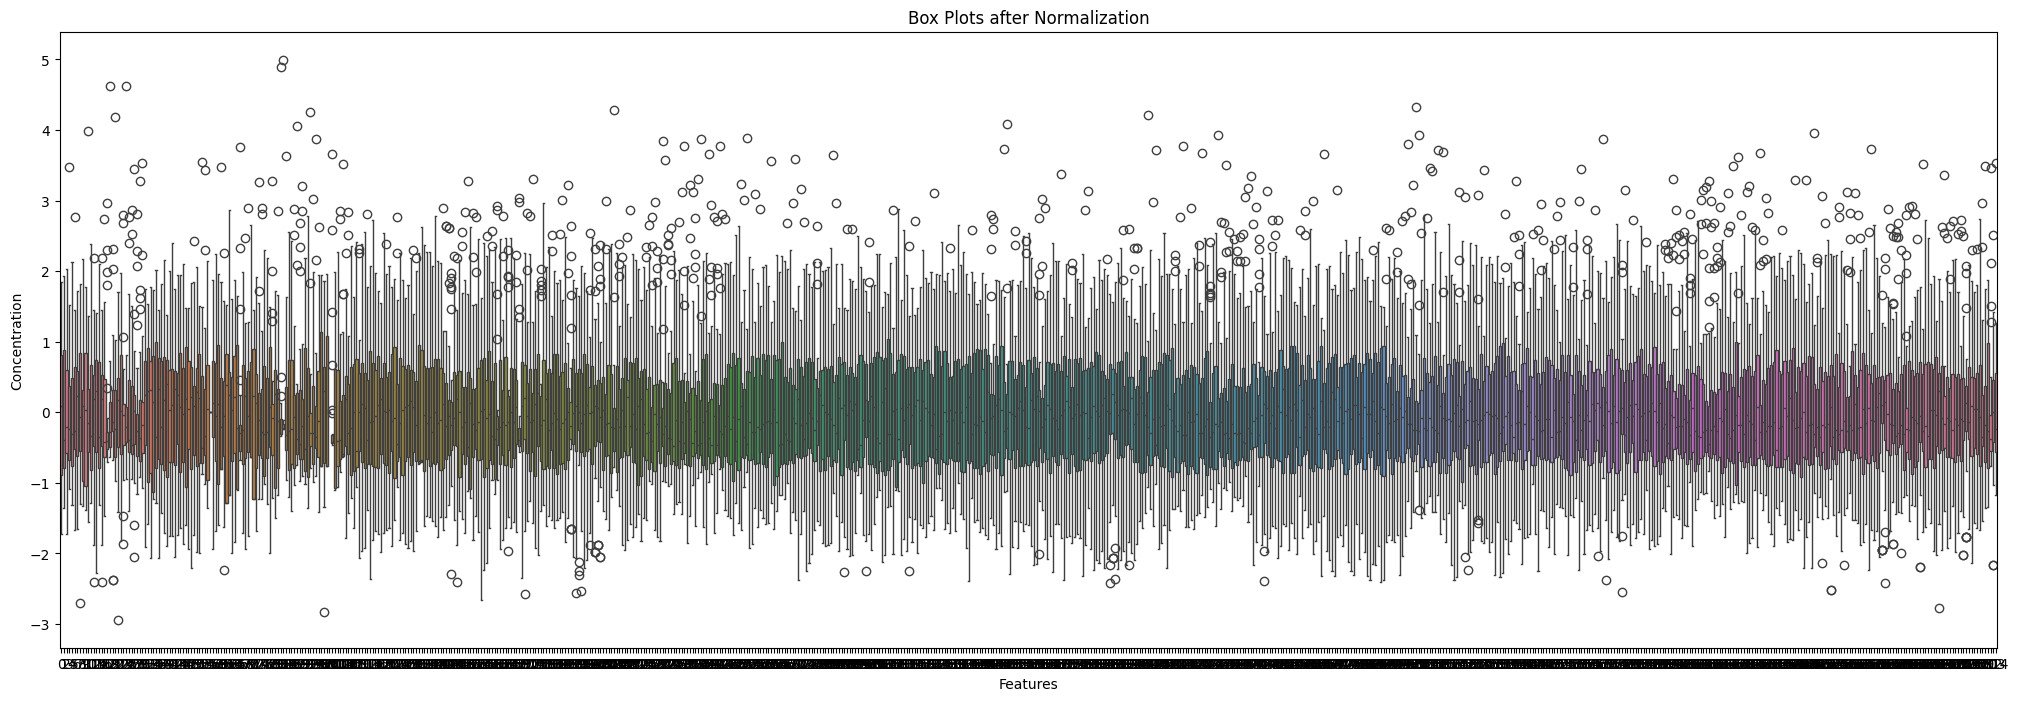

In [80]:
##box plot after normalization
fig = plt.figure(figsize = (25,8))
sns.boxplot(data=X2_scaled, orient='v')
plt.title('Box Plots after Normalization')
plt.xlabel('Features')
plt.ylabel('Concentration')
plt.savefig('boxplot_targ_after_norm.png', dpi=600)
plt.savefig('boxplot_targ_after_norm.tiff', dpi=600)
plt.show()

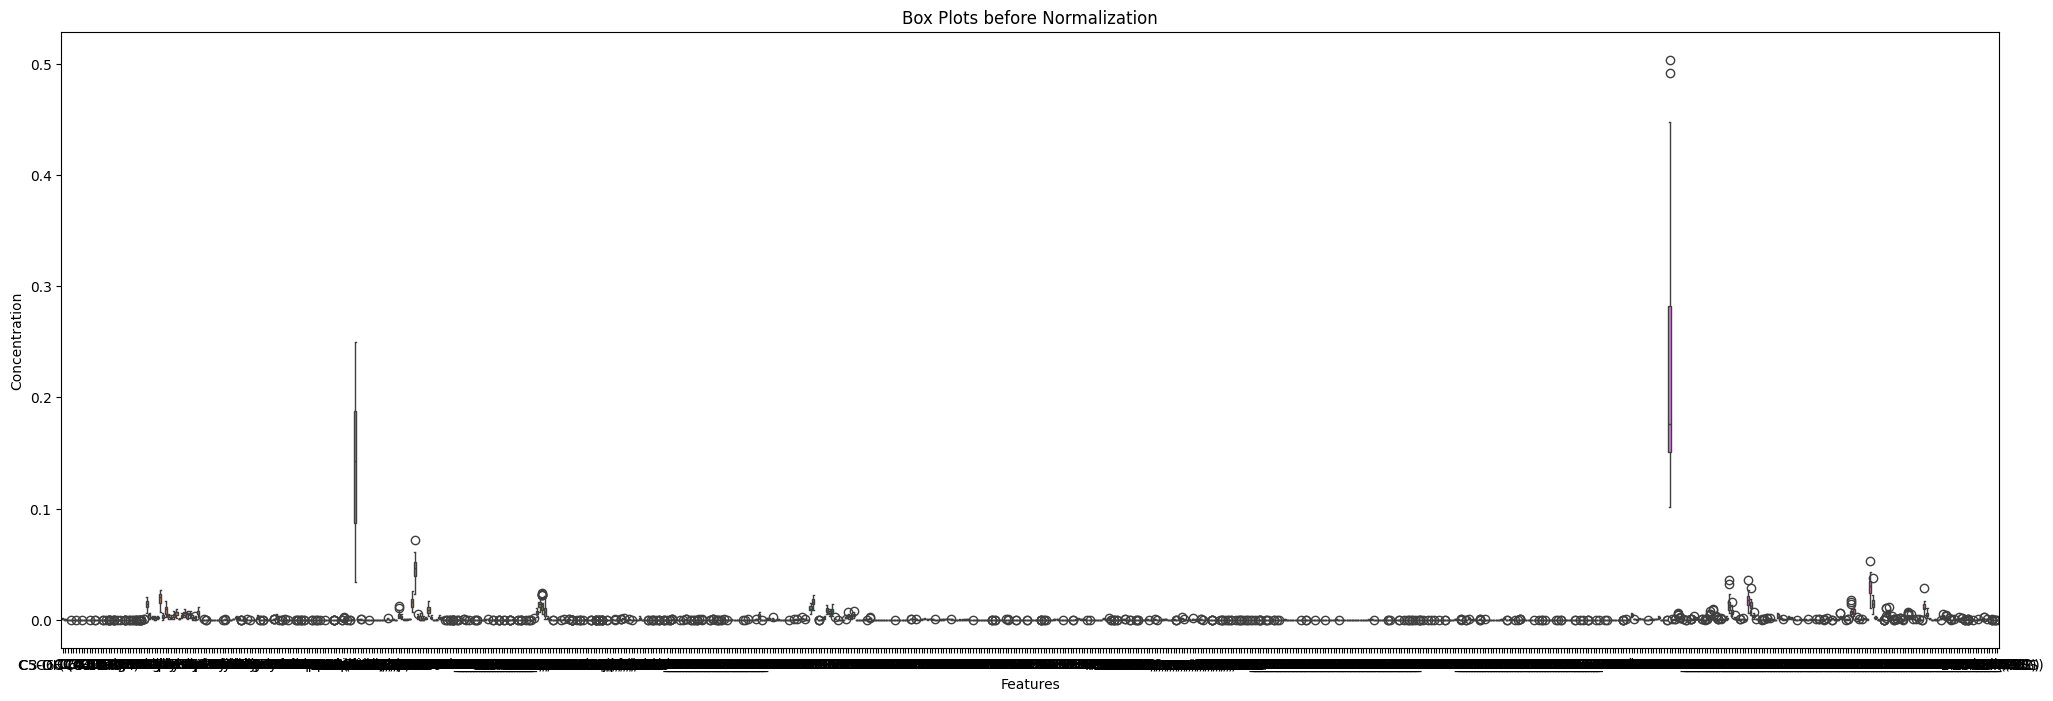

In [81]:
##box plot before normalization
fig = plt.figure(figsize = (25,8))
sns.boxplot(data=X2log_transformed_data, orient='v')
plt.title('Box Plots before Normalization')
plt.xlabel('Features')
plt.ylabel('Concentration')
plt.savefig('boxplot_targ_before_norm.png', dpi=600)
plt.savefig('boxplot_targ_before_norm.tiff', dpi=600)
plt.show()

In [ ]:
#PCA
pca1 = PCA(n_components=2)
PC2=pca1.fit_transform(X2_scaled)
principalDf2 = pd.DataFrame(data = PC2
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
pca1
# explained variance for each principal component
explained_variance1 = pca1.explained_variance_ratio_
cumulative_variance1 = np.cumsum(explained_variance1)

In [ ]:
finalDf2 = pd.concat([principalDf2, df[['Group']]], axis = 1)
finalDf2

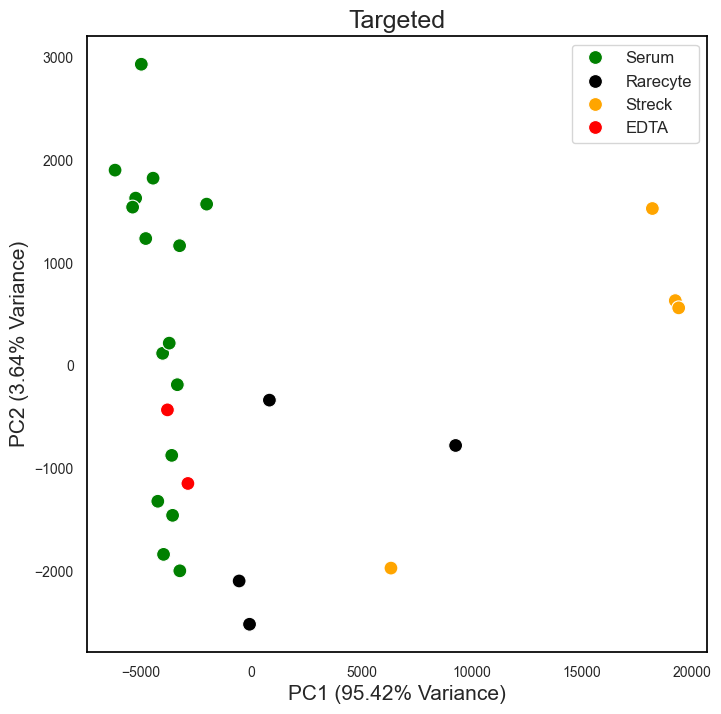

In [ ]:
sns.set(style="whitegrid") 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Targeted', fontsize = 18)

plt.grid (False)
ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")


sns.scatterplot(x=finalDf2['principal component 1']
               , y=finalDf2['principal component 2']
               , s = 100, hue=df['Group'], palette={'Serum': 'green', 'EDTA': 'Red', 'Rarecyte' : 'black', 'Streck': 'orange'})
ax.legend(fontsize= 12, loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(f'PC1 ({explained_variance1[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({explained_variance1[1]*100:.2f}% Variance)')
plt.show()


In [ ]:
##concat normalized data with group labels
X2_df=pd.DataFrame(X2_scaled)
concat_targ = pd.concat([X2_df, df[['Group']]], axis = 1)
concat_targ

In [ ]:
##to check the normality of data, Shapiro-Wilk test
stat, p_value = shapiro(X2_scaled) # When p-value < 0.05, reject the null hypothesis

In [348]:
stat


0.9813146591186523

In [ ]:
p_value ##data is not normal and hence we reject the null hypothesis

8.65894550970984e-39

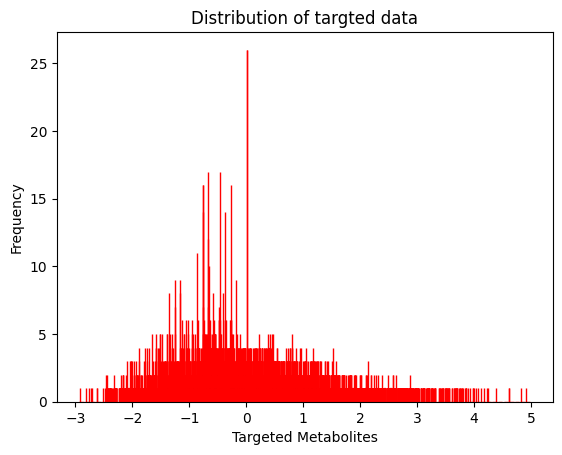

In [ ]:
# Visualize the data with a histogram
plt.hist(X2_scaled, bins='auto', edgecolor='red')
plt.xlabel('Targeted Metabolites')
plt.ylabel('Frequency')
plt.title('Distribution of targted data')
plt.savefig('distribution_full.png', dpi=600)
plt.savefig('distribution_full.tiff', dpi=600)
plt.show()


In [ ]:
# batches for statistics
batch_1 = concat_targ.groupby('Group').get_group('Serum')
batch_2 = concat_targ.groupby('Group').get_group('Rarecyte')
batch_3 = concat_targ.groupby('Group').get_group('EDTA')
batch_4 = concat_targ.groupby('Group').get_group('Streck')

batch_1 = batch_1.iloc[:, 1:-1]
batch_1.fillna(0, inplace=True)

batch_2 = batch_2.iloc[:, 1:-1]
batch_2.fillna(0, inplace=True)

batch_3 = batch_3.iloc[:, 1:-1]
batch_3.fillna(0, inplace=True)

batch_4 = batch_4.iloc[:, 1:-1]
batch_4.fillna(0, inplace=True)
col_1= batch_1.columns

In [ ]:

#KW (non-parametric test)
statistic, p_value = stats.kruskal(batch_1, batch_2, batch_3, batch_4)

# result df
results1 = pd.DataFrame(data={'KW statistics': [statistic], 'p-value': [p_value]})

row_1 = ("KW statistics", 'p-value')
results = results.set_axis(col_1, axis=1)
results = results.set_axis(row_1, axis=0)

# Bonferroni correction 
num_comparisons = len(results.columns) - 1  
results.loc['Bonferroni_corrected'] = results.loc['p-value'] * num_comparisons

# sig.metabolites after BC
significant_metabolites_bonf = results.columns[results.loc['Bonferroni_corrected'] < 0.05]
significant_metabolites_bonf



In [ ]:
# Also check Benjamini-Hochberg correction
p_values = results.loc['p-value']
reject, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

results.loc['FDR_corrected'] = corrected_p_values

# Selecting significant metabolites after FDR correction
significant_metabolites_fdr = results.columns[results.loc['FDR_corrected'] < 0.05]

print("Significant Metabolites after Bonferroni Correction:")
print(significant_metabolites_bonf)

print("\nSignificant Metabolites after FDR Correction:")
print(significant_metabolites_fdr)

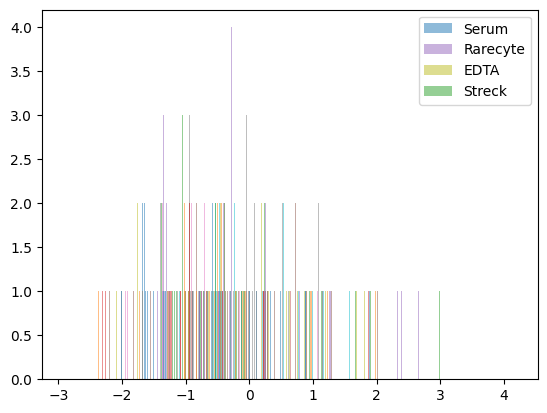

In [ ]:

plt.hist(batch_1, bins=20, alpha=0.5, label='Serum')
plt.hist(batch_2, bins=20, alpha=0.5, label='Rarecyte')
plt.hist(batch_3, bins=20, alpha=0.5, label='EDTA')
plt.hist(batch_4, bins=20, alpha=0.5, label='Streck')
plt.legend()
plt.savefig('distribution.png', dpi=600)
plt.savefig('distribution.tiff', dpi=600)
plt.show()


In [ ]:
# Encode the 'Label' column
label_encoder = LabelEncoder()
df['Label_encoded'] = label_encoder.fit_transform(df['Group'])
selected_columns = df.iloc[:, 3:53] 

correlation_coefficients = selected_columns.apply(lambda col: col.corr(df['Label_encoded']))

correlation_matrix = selected_columns.corr()

x_tick_labels = df.iloc[:, 3:53].columns
y_tick_labels = df.iloc[:, 53:103].columns

plt.figure(figsize=(10, 8))
heatmap= sns.heatmap(correlation_matrix, annot=False, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.xticks(range(len(x_tick_labels)), x_tick_labels, rotation=90, ha='right')
plt.yticks(range(len(y_tick_labels)), y_tick_labels, rotation=0)
plt.title('Correlation Heatmap targeted metabolites')
plt.savefig('heatmap_targ.png', dpi=600, bbox_inches='tight')
plt.savefig('heatmap_targ.tiff', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()

untargeted data

In [ ]:
###Top 4 metabolites concentration plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axs = axs.flatten()

palette = {'Near miss/SB': "purple", 'Control': "lime"}
common_kwargs = dict(x="Trimester", hue='Group', data=data, palette=palette, inner='box')

sns.violinplot(y="FigA", ax=axs[0], **common_kwargs)
axs[0].set_title("FigA", fontsize=18)


sns.violinplot(y="FigB", ax=axs[1], **common_kwargs)
axs[1].set_title("FigB", fontsize=18)

sns.violinplot(y="FigC", ax=axs[1], **common_kwargs)
axs[2].set_title("FigC", fontsize=18)

sns.violinplot(y="FigC", ax=axs[1], **common_kwargs)
axs[3].set_title("FigC", fontsize=18)

fig.text(0.5, 0.04, 'Trimester', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Concentration (µmol/L)', va='center', rotation='vertical', fontsize=16)

# Adjust appearance for all axes
for ax in axs:
    ax.grid(False)
    ax.tick_params(axis='both', colors='black', labelsize=12)
    for spine in ax.spines.values():
        spine.set_color("black")
    ax.legend_.remove()  

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', frameon=False, fontsize=12)

plt.show()


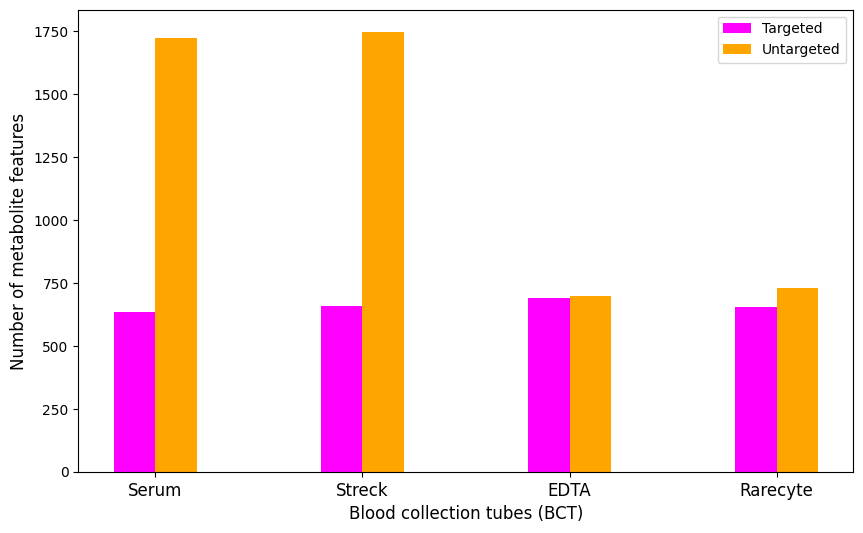

In [ ]:
# total number of metabolites
data = {
    'Comparison': ['Serum', 'Streck', 'EDTA', 'Rarecyte'],
    'Targeted': [636, 659, 689, 655],
    'Untargeted': [1723, 1748, 699, 729],

}

results_df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(False)

bar_width = 0.2

r1 = range(len(results_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

ax.bar(r2, results_df['Targeted'], width=0.2, label='Targeted', color='fuchsia')
ax.bar(r3, results_df['Untargeted'], width=0.2, label='Untargeted', color='orange')

ax.set_ylabel('Number of metabolite features', fontsize=12)
ax.set_xlabel('Blood collection tubes (BCT)', fontsize=12)
ax.set_xticks([r + bar_width * 1.5 for r in range(len(results_df))])
ax.set_xticklabels(results_df['Comparison'], fontsize=12)

ax.legend(loc='upper right')

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")
plt.savefig('No_metabolites_BCT.png', dpi=600)
plt.savefig('No_metabolites_BCT.tiff', dpi=600)
plt.show()